In [21]:
import json 
import os
import subprocess
import numpy as np

In [ ]:
dx_range = [-0.5, 0.5]
dy_range = [-0.3, 0.3]
dtheta_range = [-0.5, 0.5]

presets_dir = "awd/data/assets/go_bdx/placo_presets"
tmp_dir = os.path.join(presets_dir, "tmp")
os.makedirs(tmp_dir, exist_ok=True)

with open(os.path.join(presets_dir, f"medium.json")) as file:
    data = json.load(file)

for i in range(100):
    data["dx"] = np.random.uniform(*dx_range)
    data["dy"] = np.random.uniform(*dy_range)
    data["dtheta"] = np.random.uniform(*dtheta_range)

    tmp_preset = os.path.join(tmp_dir, "preset.json")
    with open(tmp_preset, 'w') as file:
        json.dump(data, file, indent=4)

    subprocess.run(['python', "gait_generator.py", "--preset", f"{tmp_preset}", "--name", f"{i}"])

In [7]:
gait_speeds = {"slow": 0.05,
                "medium": 0.1,
                "fast": 0.2}

presets_dir = "awd/data/assets/go_bdx/placo_presets"
gait_motions = ["standing", "forward", "backward", "left", "right", "ang_left", "ang_right", "dia_forward", "dia_backward"]

In [9]:
tmp_dir = os.path.join(presets_dir, "tmp")
os.makedirs(tmp_dir, exist_ok=True)

for gait_speed in gait_speeds:
    gait_speed_val = gait_speeds[gait_speed]
    
    for gait_motion in gait_motions:
        with open(os.path.join(presets_dir, f"{gait_speed}.json")) as file:
            data = json.load(file)
                
        if gait_speed == "slow" and gait_motion == "standing":
            pass
        elif gait_motion == "forward":
            data["dx"] = gait_speed_val
        elif gait_motion == "backward":
            data["dx"] = -gait_speed_val
        elif gait_motion == "left":
            data["dy"] = gait_speed_val
        elif gait_motion == "right":
            data["dy"] = -gait_speed_val
        elif gait_motion == "dia_forward":
            data["dx"] = gait_speed_val/2
            data["dy"] = gait_speed_val/2
        elif gait_motion == "dia_backward":
            data["dx"] = -gait_speed_val/2
            data["dy"] = -gait_speed_val/2
        elif gait_motion == "ang_left":
            data["dtheta"] = gait_speed_val
        elif gait_motion == "ang_right":
            data["dtheta"] = -gait_speed_val

        tmp_preset = os.path.join(tmp_dir, "preset.json")
        with open(tmp_preset, 'w') as file:
            json.dump(data, file, indent=4)

        subprocess.run(['python', "gait_generator.py", "--preset", f"{tmp_preset}", "--name", f"{gait_motion}_{gait_speed}"])

<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': 0.0, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -8, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.45, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05367740330879669, 'left_hip_roll': -0.07683769751763382, 'left_hip_pitch': 0.18475466530836182, 'left_knee': 0.05482247538374539, 'left_ankle': 0.01117807991273989, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.044872336477187816, 'right_hip_roll': -0.01481880785078353, 'right_hip_pitch': -0.22322557435862786, 'right_knee': -0.1462268135651895, 'right_ankle': -0.06370793282740764}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x 0.0012
avg lin_vel_y 0.0053
avg yaw 0.0161
DONE, saving standing_slow.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.05, 'dy': 0.0, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -8, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.45, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05367740330879669, 'left_hip_roll': -0.07683769751763384, 'left_hip_pitch': 0.18475466530836226, 'left_knee': 0.05482247538374608, 'left_ankle': 0.01117807991274011, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04487233647718783, 'right_hip_roll': -0.014818807850783619, 'right_hip_pitch': -0.22322557435862805, 'right_knee': -0.14622681356518974, 'right_ankle': -0.06370793282740769}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x 0.082
avg lin_vel_y 0.0112
avg yaw 0.0161
DONE, saving forward_slow.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': -0.05, 'dy': 0.0, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -8, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.45, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05367740330879669, 'left_hip_roll': -0.07683769751763384, 'left_hip_pitch': 0.18475466530836226, 'left_knee': 0.05482247538374608, 'left_ankle': 0.01117807991274011, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04487233647718783, 'right_hip_roll': -0.014818807850783619, 'right_hip_pitch': -0.22322557435862805, 'right_knee': -0.14622681356518974, 'right_ankle': -0.06370793282740769}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x -0.0797
avg lin_vel_y -0.0006
avg yaw 0.0161
DONE, saving backward_slow.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': 0.05, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -8, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.45, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05367740330879669, 'left_hip_roll': -0.07683769751763384, 'left_hip_pitch': 0.18475466530836235, 'left_knee': 0.0548224753837462, 'left_ankle': 0.011178079912740184, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04487233647718782, 'right_hip_roll': -0.014818807850783558, 'right_hip_pitch': -0.2232255743586287, 'right_knee': -0.1462268135651908, 'right_ankle': -0.06370793282740811}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x -0.0047
avg lin_vel_y 0.0861
avg yaw 0.0161
DONE, saving left_slow.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': -0.05, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -8, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.45, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05367740330879669, 'left_hip_roll': -0.07683769751763384, 'left_hip_pitch': 0.18475466530836226, 'left_knee': 0.05482247538374608, 'left_ankle': 0.01117807991274011, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04487233647718783, 'right_hip_roll': -0.014818807850783619, 'right_hip_pitch': -0.22322557435862805, 'right_knee': -0.14622681356518974, 'right_ankle': -0.06370793282740769}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x 0.0071
avg lin_vel_y -0.0756
avg yaw 0.0161
DONE, saving right_slow.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': 0.0, 'dtheta': 0.05, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -8, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.45, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05367740330879669, 'left_hip_roll': -0.07683769751763384, 'left_hip_pitch': 0.18475466530836226, 'left_knee': 0.05482247538374608, 'left_ankle': 0.01117807991274011, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04487233647718783, 'right_hip_roll': -0.014818807850783619, 'right_hip_pitch': -0.22322557435862805, 'right_knee': -0.14622681356518974, 'right_ankle': -0.06370793282740769}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x -0.0049
avg lin_vel_y 0.0087
avg yaw 0.1006
DONE, saving ang_left_slow.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': 0.0, 'dtheta': -0.05, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -8, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.45, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05367740330879669, 'left_hip_roll': -0.07683769751763384, 'left_hip_pitch': 0.184754665308362, 'left_knee': 0.05482247538374559, 'left_ankle': 0.011178079912739912, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04487233647718782, 'right_hip_roll': -0.01481880785078359, 'right_hip_pitch': -0.22322557435862805, 'right_knee': -0.1462268135651897, 'right_ankle': -0.06370793282740768}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x 0.0027
avg lin_vel_y -0.0011
avg yaw -0.0683
DONE, saving ang_right_slow.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.025, 'dy': 0.025, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -8, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.45, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05367740330879669, 'left_hip_roll': -0.07683769751763384, 'left_hip_pitch': 0.184754665308362, 'left_knee': 0.05482247538374559, 'left_ankle': 0.011178079912739912, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04487233647718782, 'right_hip_roll': -0.01481880785078359, 'right_hip_pitch': -0.22322557435862805, 'right_knee': -0.1462268135651897, 'right_ankle': -0.06370793282740768}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x 0.0386
avg lin_vel_y 0.0487
avg yaw 0.0161
DONE, saving dia_forward_slow.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': -0.025, 'dy': -0.025, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -8, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.45, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05367740330879669, 'left_hip_roll': -0.07683769751763384, 'left_hip_pitch': 0.184754665308362, 'left_knee': 0.05482247538374559, 'left_ankle': 0.011178079912739912, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04487233647718782, 'right_hip_roll': -0.01481880785078359, 'right_hip_pitch': -0.22322557435862805, 'right_knee': -0.1462268135651897, 'right_ankle': -0.06370793282740768}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x -0.0363
avg lin_vel_y -0.0381
avg yaw 0.0161
DONE, saving dia_backward_slow.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': 0.0, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -2, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.35, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05081933526338989, 'left_hip_roll': -0.07711495926323925, 'left_hip_pitch': 0.09954380185031157, 'left_knee': 0.06707963019327579, 'left_ankle': 0.003745663729996652, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04855295641447677, 'right_hip_roll': -0.014517748049874421, 'right_hip_pitch': -0.13273480966972254, 'right_knee': -0.15354714313733298, 'right_ankle': -0.05691831705714387}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x 0.0004
avg lin_vel_y 0.004
avg yaw 0.0206
DONE, saving standing_medium.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.1, 'dy': 0.0, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -2, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.35, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05081933526338989, 'left_hip_roll': -0.07711495926323925, 'left_hip_pitch': 0.09954380185031157, 'left_knee': 0.06707963019327579, 'left_ankle': 0.003745663729996652, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04855295641447677, 'right_hip_roll': -0.014517748049874421, 'right_hip_pitch': -0.13273480966972254, 'right_knee': -0.15354714313733298, 'right_ankle': -0.05691831705714387}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x 0.2163
avg lin_vel_y 0.0255
avg yaw 0.0206
DONE, saving forward_medium.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': -0.1, 'dy': 0.0, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -2, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.35, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05081933526338989, 'left_hip_roll': -0.07711495926323925, 'left_hip_pitch': 0.09954380185031157, 'left_knee': 0.06707963019327579, 'left_ankle': 0.003745663729996652, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04855295641447677, 'right_hip_roll': -0.014517748049874421, 'right_hip_pitch': -0.13273480966972254, 'right_knee': -0.15354714313733298, 'right_ankle': -0.05691831705714387}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x -0.2155
avg lin_vel_y -0.0174
avg yaw 0.0206
DONE, saving backward_medium.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': 0.1, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -2, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.35, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05081933526338989, 'left_hip_roll': -0.07711495926323925, 'left_hip_pitch': 0.09954380185031173, 'left_knee': 0.06707963019327609, 'left_ankle': 0.003745663729996812, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04855295641447677, 'right_hip_roll': -0.014517748049874442, 'right_hip_pitch': -0.13273480966972237, 'right_knee': -0.15354714313733275, 'right_ankle': -0.05691831705714381}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x -0.0136
avg lin_vel_y 0.1822
avg yaw 0.0169
DONE, saving left_medium.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': -0.1, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -2, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.35, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05081933526338989, 'left_hip_roll': -0.07711495926323925, 'left_hip_pitch': 0.09954380185031173, 'left_knee': 0.06707963019327612, 'left_ankle': 0.0037456637299968397, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04855295641447677, 'right_hip_roll': -0.01451774804987445, 'right_hip_pitch': -0.1327348096697223, 'right_knee': -0.15354714313733264, 'right_ankle': -0.05691831705714378}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x 0.015
avg lin_vel_y -0.1755
avg yaw 0.0171
DONE, saving right_medium.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': 0.0, 'dtheta': 0.1, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -2, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.35, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05081933526338989, 'left_hip_roll': -0.07711495926323925, 'left_hip_pitch': 0.09954380185031157, 'left_knee': 0.06707963019327579, 'left_ankle': 0.003745663729996652, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04855295641447677, 'right_hip_roll': -0.014517748049874421, 'right_hip_pitch': -0.13273480966972254, 'right_knee': -0.15354714313733298, 'right_ankle': -0.05691831705714387}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x -0.0089
avg lin_vel_y 0.0008
avg yaw 0.2359
DONE, saving ang_left_medium.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': 0.0, 'dtheta': -0.1, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -2, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.35, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05081933526338989, 'left_hip_roll': -0.07711495926323925, 'left_hip_pitch': 0.0995438018503115, 'left_knee': 0.06707963019327584, 'left_ankle': 0.0037456637299967703, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04855295641447677, 'right_hip_roll': -0.014517748049874456, 'right_hip_pitch': -0.13273480966972245, 'right_knee': -0.15354714313733286, 'right_ankle': -0.05691831705714383}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x -0.0017
avg lin_vel_y -0.0053
avg yaw -0.1947
DONE, saving ang_right_medium.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.05, 'dy': 0.05, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -2, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.35, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05081933526338989, 'left_hip_roll': -0.07711495926323925, 'left_hip_pitch': 0.0995438018503115, 'left_knee': 0.06707963019327584, 'left_ankle': 0.0037456637299967703, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04855295641447677, 'right_hip_roll': -0.014517748049874456, 'right_hip_pitch': -0.13273480966972245, 'right_knee': -0.15354714313733286, 'right_ankle': -0.05691831705714383}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x 0.0976
avg lin_vel_y 0.1227
avg yaw 0.0206
DONE, saving dia_forward_medium.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': -0.05, 'dy': -0.05, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': -2, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.35, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.05081933526338989, 'left_hip_roll': -0.07711495926323925, 'left_hip_pitch': 0.09954380185031157, 'left_knee': 0.06707963019327579, 'left_ankle': 0.003745663729996652, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.04855295641447677, 'right_hip_roll': -0.014517748049874421, 'right_hip_pitch': -0.13273480966972254, 'right_knee': -0.15354714313733298, 'right_ankle': -0.05691831705714387}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x -0.0968
avg lin_vel_y -0.1146
avg yaw 0.0206
DONE, saving dia_backward_medium.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': 0.0, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': 6, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.25, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.04698557882467102, 'left_hip_roll': -0.07705313755643177, 'left_hip_pitch': -0.011694935942325069, 'left_knee': 0.08853622760664163, 'left_ankle': -0.00342832807612626, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.053470643222330076, 'right_hip_roll': -0.014681260217830859, 'right_hip_pitch': -0.013911263115788436, 'right_knee': -0.16717212273305712, 'right_ankle': -0.04989886113874984}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x 0.0004
avg lin_vel_y -0.0003
avg yaw 0.0306
DONE, saving standing_fast.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.2, 'dy': 0.0, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': 6, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.25, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.04698557882467102, 'left_hip_roll': -0.07705313755643177, 'left_hip_pitch': -0.011694935942324906, 'left_knee': 0.08853622760664176, 'left_ankle': -0.003428328076126292, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.053470643222330076, 'right_hip_roll': -0.014681260217830908, 'right_hip_pitch': -0.013911263115788086, 'right_knee': -0.16717212273305665, 'right_ankle': -0.04989886113874974}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x 0.3133
avg lin_vel_y 0.0223
avg yaw 0.0153
DONE, saving forward_fast.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': -0.2, 'dy': 0.0, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': 6, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.25, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.04698557882467102, 'left_hip_roll': -0.07705313755643177, 'left_hip_pitch': -0.011694935942324906, 'left_knee': 0.08853622760664176, 'left_ankle': -0.003428328076126292, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.053470643222330076, 'right_hip_roll': -0.014681260217830908, 'right_hip_pitch': -0.013911263115788086, 'right_knee': -0.16717212273305665, 'right_ankle': -0.04989886113874974}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x -0.3126
avg lin_vel_y -0.0232
avg yaw 0.0153
DONE, saving backward_fast.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': 0.2, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': 6, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.25, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.04698557882467102, 'left_hip_roll': -0.07705313755643177, 'left_hip_pitch': -0.011694935942324581, 'left_knee': 0.08853622760664233, 'left_ankle': -0.0034283280761260426, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.053470643222330076, 'right_hip_roll': -0.01468126021783091, 'right_hip_pitch': -0.01391126311578802, 'right_knee': -0.16717212273305657, 'right_ankle': -0.04989886113874974}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x -0.0149
avg lin_vel_y 0.258
avg yaw 0.0126
DONE, saving left_fast.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': -0.2, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': 6, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.25, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.04698557882467102, 'left_hip_roll': -0.07705313755643177, 'left_hip_pitch': -0.011694935942324906, 'left_knee': 0.08853622760664176, 'left_ankle': -0.003428328076126292, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.053470643222330076, 'right_hip_roll': -0.014681260217830908, 'right_hip_pitch': -0.013911263115788086, 'right_knee': -0.16717212273305665, 'right_ankle': -0.04989886113874974}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x 0.0158
avg lin_vel_y -0.2608
avg yaw 0.0126
DONE, saving right_fast.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': 0.0, 'dtheta': 0.2, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': 6, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.25, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.04698557882467102, 'left_hip_roll': -0.07705313755643177, 'left_hip_pitch': -0.011694935942324906, 'left_knee': 0.08853622760664176, 'left_ankle': -0.003428328076126292, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.053470643222330076, 'right_hip_roll': -0.014681260217830908, 'right_hip_pitch': -0.013911263115788086, 'right_knee': -0.16717212273305665, 'right_ankle': -0.04989886113874974}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x -0.0012
avg lin_vel_y -0.0009
avg yaw 0.0421
DONE, saving ang_left_fast.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.0, 'dy': 0.0, 'dtheta': -0.2, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': 6, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.25, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.04698557882467102, 'left_hip_roll': -0.07705313755643177, 'left_hip_pitch': -0.011694935942324581, 'left_knee': 0.08853622760664233, 'left_ankle': -0.0034283280761260426, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.053470643222330076, 'right_hip_roll': -0.01468126021783091, 'right_hip_pitch': -0.01391126311578802, 'right_knee': -0.16717212273305657, 'right_ankle': -0.04989886113874974}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x 0.002
avg lin_vel_y -0.0007
avg yaw 0.019
DONE, saving ang_right_fast.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.1, 'dy': 0.1, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': 6, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.25, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.04698557882467102, 'left_hip_roll': -0.07705313755643177, 'left_hip_pitch': -0.011694935942324626, 'left_knee': 0.08853622760664231, 'left_ankle': -0.0034283280761260256, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.053470643222330076, 'right_hip_roll': -0.014681260217830908, 'right_hip_pitch': -0.013911263115788473, 'right_knee': -0.16717212273305715, 'right_ankle': -0.049898861138749834}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x 0.1894
avg lin_vel_y 0.2295
avg yaw 0.0205
DONE, saving dia_forward_fast.json


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': -0.1, 'dy': -0.1, 'dtheta': 0.0, 'duration': 5, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.2, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': 6, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.25, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.04698557882467102, 'left_hip_roll': -0.07705313755643177, 'left_hip_pitch': -0.011694935942324626, 'left_knee': 0.08853622760664231, 'left_ankle': -0.0034283280761260256, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.053470643222330076, 'right_hip_roll': -0.014681260217830908, 'right_hip_pitch': -0.013911263115788473, 'right_knee': -0.16717212273305715, 'right_ankle': -0.049898861138749834}
center_y_pos: -0.095
recorded 600 frames
avg lin_vel_x -0.1889
avg lin_vel_y -0.2308
avg yaw 0.0205
DONE, saving dia_backward_fast.json


In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
anim = np.load("anim.npy")
sim = np.load("sim.npy")

In [15]:
anim.shape

(980, 50, 2, 3)

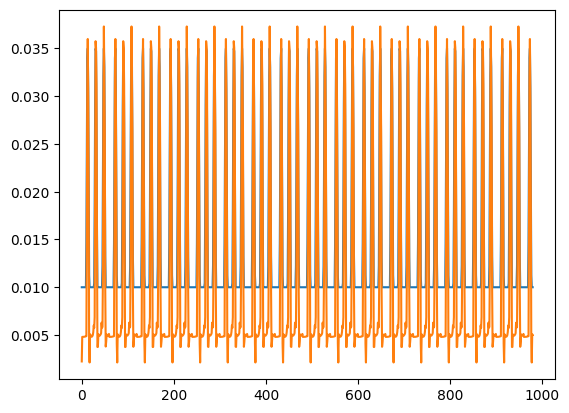

In [20]:
plt.plot(anim[:, 0, 0, 2])
plt.plot(sim[:, 0, 0, 2])